In [81]:
# Libraries required for Webscraping
import requests
from bs4 import BeautifulSoup

In [82]:
# Libraries required for EDA and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

In [83]:
import warnings
warnings.filterwarnings('ignore') # Supresses warnings

In [ ]:
# Comments and basic EDA + PPT.

# 1. Analysis on restaurants  in different cities.
# 2. Analysis on food items in different cities and restaurants.

In [84]:
# Cities in Title form
cities = [ "Delhi-NCR","Mumbai","Bengaluru","Pune","Dubai","Kolkata","Chennai","Hyderabad", 
          "Ahmedabad","Lucknow","Jaipur","Chandigarh-Tricity","Goa","Indore","Visakhapatnam", 
          "Agra","Udaipur","Mangalore-Tricity","Patna","Vadodara","Mysuru","Amritsar", "Kochi",
          "Bhubaneswar","Coimbatore","Ludhiana","Ranchi","Thiruvananthapuram", "Nagpur","Madurai","Abu-Dhabi" ] 

# Cities in lowercase form for url
cities_ = [ "delhi-ncr","mumbai","bengaluru","pune","dubai","kolkata","chennai","hyderabad",
           "ahmedabad","lucknow","jaipur","chandigarh-tricity","goa","indore","visakhapatnam",
           "agra","udaipur","mangalore-tricity","patna","vadodara","mysuru","amritsar", "kochi",
           "bhubaneswar","coimbatore","ludhiana","ranchi","thiruvananthapuram", "nagpur","madurai","abu-dhabi" ] 


In [85]:
headers = { "User-Agent": "Mozilla/5.0" } # This mimincs a request from a browser


restaurant_data = [] # Data container

# ------------------------------------------------------------------------------------------------

for city_slug, city_name in zip(cities_, cities):

    # We scrape 5 pages each of all the listed cities
    for page in range(1, 6): 

        url = f"https://www.eazydiner.com/restaurants?location={city_slug}&page={page}"
        print(f"Scraping {city_name} - Page {page}")

        # Sends request to the url and fetches the html from of data
        response = requests.get(url, headers=headers)

        # Parses through the fetched html data
        soup = BeautifulSoup(response.text, "html.parser")

        # ------------------------------------------------------------------------------------------------

        # Extract restaurant name blocks
        name_blocks = soup.find_all("div", class_=re.compile("listing_res_name"))

        if len(name_blocks) == 0:
            print("No restaurants found. Breaking.")
            break

        # ------------------------------------------------------------------------------------------------

        # Extract discount blocks
        discount_blocks = [
            d.text.strip()
            for d in soup.find_all("div", string=re.compile("%"))
            if "off" in d.text.lower() or "flat" in d.text.lower()
        ]
        
        # ------------------------------------------------------------------------------------------------
        
        
        # Extract grey blocks (area, cuisine, cost)
        grey_blocks_all = soup.find_all("div", class_=re.compile("font-14 grey"))

        grey_chunks = [
            grey_blocks_all[i:i+3]
            for i in range(0, len(grey_blocks_all), 3)
        ]

        print("Restaurants found:", len(name_blocks))
        print("Discounts found:", len(discount_blocks))

        # ------------------------------------------------------------------------------------------------

        for idx, name_block in enumerate(name_blocks):

            name = name_block.find("a").text.strip()

            # -------- Area / Cuisine / Cost --------
            area = None
            cuisine = None
            cost = None

            if idx < len(grey_chunks):
                chunk = grey_chunks[idx]
                if len(chunk) > 0:
                    area = chunk[0].text.strip()
                    
                if len(chunk) > 1:
                    cuisine = chunk[1].text.strip()
                    
                if len(chunk) > 2:
                    cost = chunk[2].text.strip()

            # -------- Rating --------
            parent_container = name_block.find_parent().find_parent()
            rating_tag = parent_container.find("text")
            rating = rating_tag.text.strip() if rating_tag else None

            # -------- Discount --------
            discount = discount_blocks[idx] if idx < len(discount_blocks) else None

            # -------- Booking & Walk-in (per restaurant) --------
            book_available = False
            walkin_available = False

            if parent_container.find(string=lambda t: t and "Book A Table" in t):
                book_available = True

            if parent_container.find(string=lambda t: t and "Walk-in Dining" in t):
                walkin_available = True

            # ------------------------------------------------------------------------------------------------

            restaurant_data.append({
                "restaurant_name": name,
                "city": city_name,
                "area": area,
                "rating": rating,
                "cost_for_two": cost,
                "cuisine": cuisine,
                "discount": discount,
                "book_table": book_available,
                "walkin_available": walkin_available
            })

        time.sleep(0.5) # So websites don't block out IPs based on persistent requests

# Converting the whole data container into dataframe
df = pd.DataFrame(restaurant_data)
df.reset_index(drop=True, inplace=True)

# Final calculation of rows of data scraped. Note: Each row contains the info about a single restaurant in a specific city.
print("Total rows collected:", df.shape[0])
print("Dataset ready.")


Scraping Delhi-NCR - Page 1
Restaurants found: 9
Discounts found: 10
Scraping Delhi-NCR - Page 2
Restaurants found: 9
Discounts found: 10
Scraping Delhi-NCR - Page 3
Restaurants found: 9
Discounts found: 10
Scraping Delhi-NCR - Page 4
Restaurants found: 9
Discounts found: 10
Scraping Delhi-NCR - Page 5
Restaurants found: 9
Discounts found: 10
Scraping Mumbai - Page 1
Restaurants found: 9
Discounts found: 9
Scraping Mumbai - Page 2
Restaurants found: 9
Discounts found: 9
Scraping Mumbai - Page 3
Restaurants found: 9
Discounts found: 9
Scraping Mumbai - Page 4
Restaurants found: 9
Discounts found: 9
Scraping Mumbai - Page 5
Restaurants found: 9
Discounts found: 9
Scraping Bengaluru - Page 1
Restaurants found: 9
Discounts found: 9
Scraping Bengaluru - Page 2
Restaurants found: 9
Discounts found: 9
Scraping Bengaluru - Page 3
Restaurants found: 9
Discounts found: 9
Scraping Bengaluru - Page 4
Restaurants found: 9
Discounts found: 9
Scraping Bengaluru - Page 5
Restaurants found: 9
Discounts

In [87]:
df

,restaurant_name,city,area,rating,cost_for_two,cuisine,discount,book_table,walkin_available
0,Hard Rock Cafe,Delhi-NCR,"Connaught Place (CP), Central Delhi",4.0,₹1500 for two,Multicuisine,50% off,False,False
1,Desi Villagio,Delhi-NCR,"Connaught Place (CP), Central Delhi",4.1,₹1300 for two,Indian,Flat 40% + 25% with Bank Offers,False,False
2,"MIST, THE Park New Delhi",Delhi-NCR,"The Park, New Delhi",4.0,₹2500 for two,Multicuisine,Flat 35% + 25% with Bank Offers,False,False
3,Duty Free Vayu Bar,Delhi-NCR,"Rajouri Garden, West Delhi",4.4,₹1500 for two,"Multicuisine, Cocktail Menu",Flat 50% + 25% with Bank Offers,False,False
4,Fifty9,Delhi-NCR,"Radisson Blu Marina, New Delhi",4.4,₹2500 for two,Multicuisine,Flat 40% + 25% with Bank Offers,False,False
...,...,...,...,...,...,...,...,...,...
1355,Ushna Comida Restaurant,Abu-Dhabi,The Souk Qaryat Al Beri,5.0,AED310 for two,Indian,40% Off,False,False
1356,Thai Point Restaurant,Abu-Dhabi,Al Dhafrah,5.0,AED75 for two,Thai,25% Off,False,False
1357,Thai Street Restaurant,Abu-Dhabi,"Al Markaziya, Abu Dhabi",1.0,AED50 for two,Thai,20% Off,False,False
1358,Larte Restaurant and Lounge LLC,Abu-Dhabi,"Saadiyat Island, Abu Dhabi",4.0,AED250 for two,Italian,None,False,False


In [165]:
df.to_csv('Raw_Scraped_Data.csv', index=False) # Uncleaned dataframe is stored in CSV format.

In [168]:
df = pd.read_csv("Raw_Scraped_Data.csv")

In [169]:
df.columns

Index(['restaurant_name', 'city', 'area', 'rating', 'cost_for_two', 'cuisine',
       'discount', 'book_table', 'walkin_available'],
      dtype='object')

# Data Understanding and Cleaning

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   restaurant_name   1360 non-null   object 
 1   city              1360 non-null   object 
 2   area              1360 non-null   object 
 3   rating            1360 non-null   float64
 4   cost_for_two      1360 non-null   object 
 5   cuisine           1360 non-null   object 
 6   discount          1359 non-null   object 
 7   book_table        1360 non-null   bool   
 8   walkin_available  1360 non-null   bool   
dtypes: bool(2), float64(1), object(6)
memory usage: 77.2+ KB


In [171]:
df.describe(include = 'all')

,restaurant_name,city,area,rating,cost_for_two,cuisine,discount,book_table,walkin_available
count,1360,1360,1360,1360.000000,1360,1360,1359,1360,1360
unique,1269,31,679,NaN,91,248,23,1,1
top,Barbeque Nation,Delhi-NCR,"Sector 1, Salt Lake",NaN,₹1000 for two,Multicuisine,Flat 10% + 25% with Bank Offers,False,False
freq,12,45,26,NaN,193,610,278,1360,1360
mean,NaN,NaN,NaN,4.196029,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.681728,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.600000,NaN,NaN,NaN,NaN,NaN


In [172]:
# Handling Nulls
df.isna().sum()/ len(df) * 100

restaurant_name     0.000000
city                0.000000
area                0.000000
rating              0.000000
cost_for_two        0.000000
cuisine             0.000000
discount            0.073529
book_table          0.000000
walkin_available    0.000000
dtype: float64

In [173]:
df.dropna(axis = 0, inplace=True) # Drop nulls if any

In [174]:
# Getting exact price out of string and converting it into float
df["cost_for_two"] = df["cost_for_two"].str.replace("₹", "")
df["cost_for_two"] = df["cost_for_two"].str.extract("(\d+)").astype(float)

In [175]:
df["discount"] = df["discount"].str.extract("(\d+)").astype(int)

In [177]:
# Coherence over column names
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.rename(columns={'cost_for_two': 'cost_for_two_in_rupees'}, inplace=True)

In [179]:
# Segregating the columns based on types.

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
bool_cols = df.select_dtypes(include=['bool']).columns 
print(f"No.of numerical columns: {len(num_cols)} \nNo.of Categorical columns: {len(cat_cols)} \nNo.of Boolean type columns: {len(bool_cols)}")

No.of numerical columns: 3 
No.of Categorical columns: 4 
No.of Boolean type columns: 2


In [180]:
print(df.duplicated().sum().item())
df.drop_duplicates(inplace=True)

0


In [181]:
# Outliers are retained during EDA as they represent genuine high-count columns; capping would distort true distribution and insights.

In [182]:
df.to_csv('Cleaned_data.csv', index=False) # Cleaned and manipulated data is stored inside a dataframe.

In [183]:
df = pd.read_csv("Cleaned_data.csv")
df

,restaurant_name,city,area,rating,cost_for_two_in_rupees,cuisine,discount,book_table,walkin_available
0,Hard Rock Cafe,Delhi-NCR,"Connaught Place (CP), Central Delhi",4.0,1500.0,Multicuisine,50,False,False
1,Desi Villagio,Delhi-NCR,"Connaught Place (CP), Central Delhi",4.1,1300.0,Indian,40,False,False
2,"MIST, THE Park New Delhi",Delhi-NCR,"The Park, New Delhi",4.0,2500.0,Multicuisine,35,False,False
3,Duty Free Vayu Bar,Delhi-NCR,"Rajouri Garden, West Delhi",4.4,1500.0,"Multicuisine, Cocktail Menu",50,False,False
4,Fifty9,Delhi-NCR,"Radisson Blu Marina, New Delhi",4.4,2500.0,Multicuisine,40,False,False
...,...,...,...,...,...,...,...,...,...
1354,Barbeque Nation,Abu-Dhabi,"Al Wahda Mall, Al Wahda",4.7,150.0,Indian,20,False,False
1355,Ushna Comida Restaurant,Abu-Dhabi,The Souk Qaryat Al Beri,5.0,310.0,Indian,40,False,False
1356,Thai Point Restaurant,Abu-Dhabi,Al Dhafrah,5.0,75.0,Thai,25,False,False
1357,Thai Street Restaurant,Abu-Dhabi,"Al Markaziya, Abu Dhabi",1.0,50.0,Thai,20,False,False


# Plots

In [184]:
# Setting the seaborn and matplotlib params intitially.
sns.set_style("whitegrid")
sns.set_context("notebook")

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Univariate Analysis

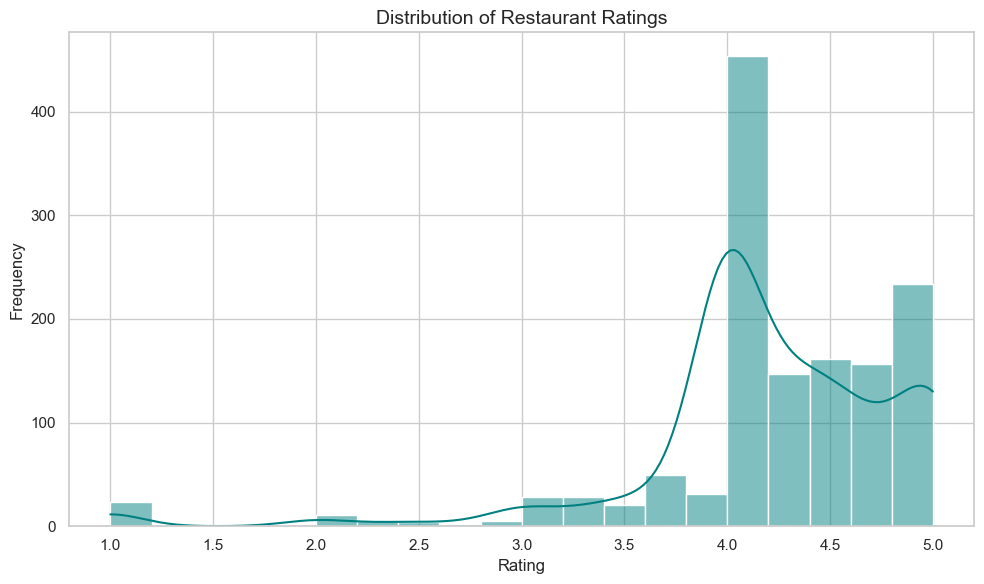

In [185]:
plt.figure()
sns.histplot(df["rating"], bins=20, kde=True, color="teal")
plt.title("Distribution of Restaurant Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("01_rating_distribution.png")
plt.show()

In [186]:
"""Insight: Most restaurants are rated between 4.0 and 4.5, which means overall customer satisfaction is quite high. Very few restaurants fall below rating 3. This shows the platform mainly features well-performing restaurants."""

'Insight: Most restaurants are rated between 4.0 and 4.5, which means overall customer satisfaction is quite high. Very few restaurants fall below rating 3. This shows the platform mainly features well-performing restaurants.'

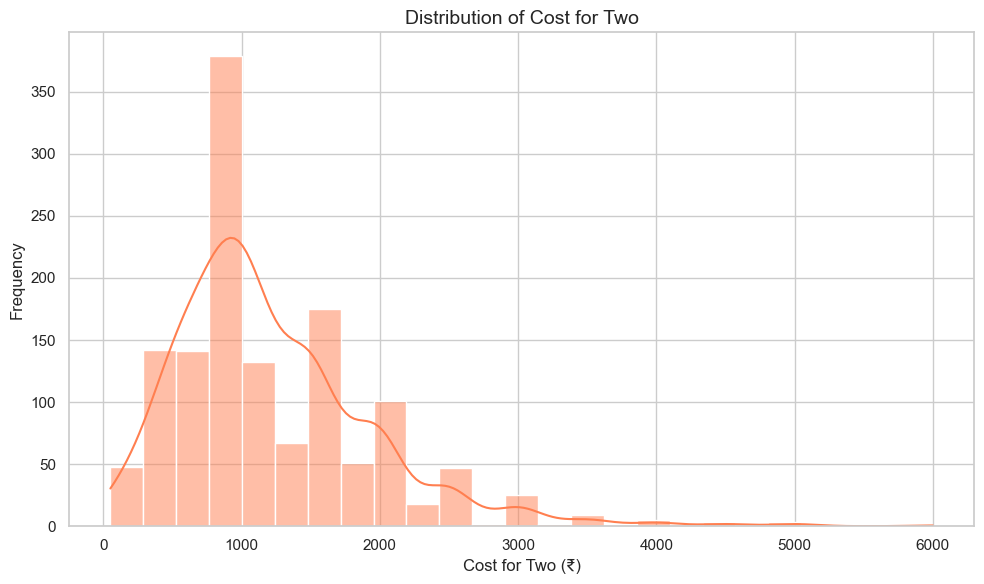

In [187]:
plt.figure()
sns.histplot(df["cost_for_two_in_rupees"], bins=25, kde=True, color="coral")
plt.title("Distribution of Cost for Two", fontsize=14)
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("02_cost_distribution.png")
plt.show()


In [188]:
"""Insight: Most restaurants fall in the ₹700–₹1500 range, which means mid-range pricing dominates the platform. Very high-cost restaurants (₹3000+) are very few. So EazyDiner mostly caters to affordable to mid-premium customers."""

'Insight: Most restaurants fall in the ₹700–₹1500 range, which means mid-range pricing dominates the platform. Very high-cost restaurants (₹3000+) are very few. So EazyDiner mostly caters to affordable to mid-premium customers.'

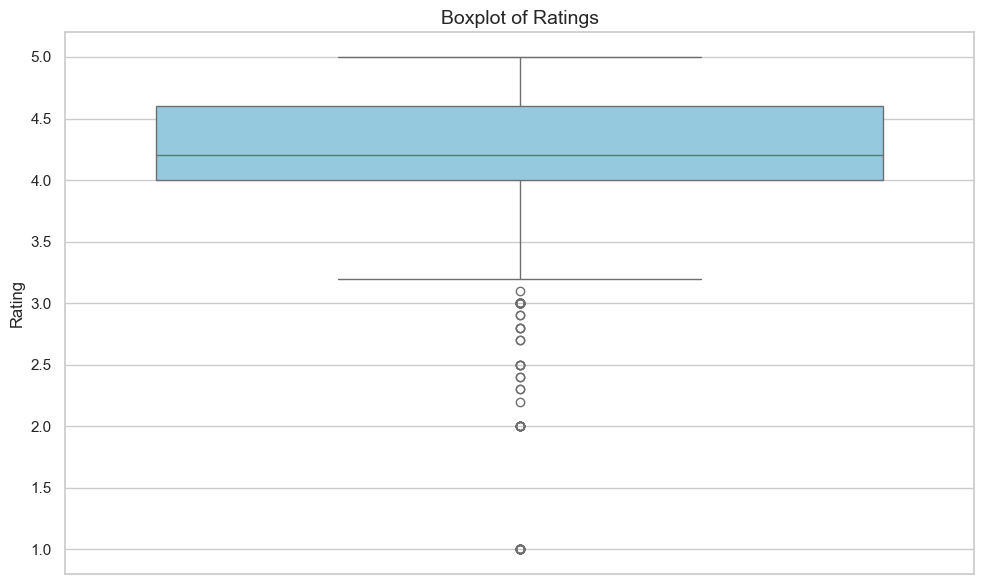

In [189]:
plt.figure()
sns.boxplot(y=df["rating"], color="skyblue")
plt.title("Boxplot of Ratings", fontsize=14)
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("03_rating_boxplot.png")
plt.show()

In [190]:
"""Insight: The median rating is around 4.2, which is strong. There are a few low-rated outliers (1–3), but they are minimal. This confirms most restaurants maintain decent quality standards."""

'Insight: The median rating is around 4.2, which is strong. There are a few low-rated outliers (1–3), but they are minimal. This confirms most restaurants maintain decent quality standards.'

In [191]:
# plt.figure(figsize=(12,6))
# city_counts = df["city"].value_counts()

# sns.barplot(
#     x=city_counts.index,
#     y=city_counts.values,
#     palette="viridis"
# )

# plt.title("Number of Restaurants by City", fontsize=14)
# plt.xlabel("City")
# plt.ylabel("Number of Restaurants")
# plt.xticks(rotation=45, ha="right")
# plt.tight_layout()
# plt.savefig("04_restaurants_by_city.png")
# plt.show()

In [192]:
""" Insight: Top metro cities like Delhi, Mumbai, Bengaluru, Pune have higher restaurant counts. Smaller cities have fewer listings. This shows EazyDiner is more focused on metro markets and still has room to expand deeper into Tier-2 cities."""

' Insight: Top metro cities like Delhi, Mumbai, Bengaluru, Pune have higher restaurant counts. Smaller cities have fewer listings. This shows EazyDiner is more focused on metro markets and still has room to expand deeper into Tier-2 cities.'

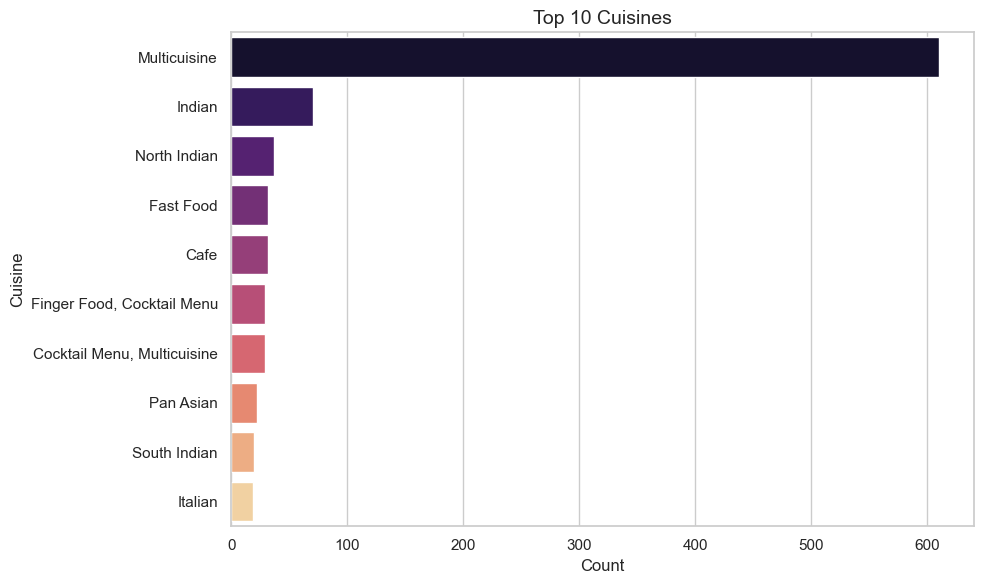

In [193]:
plt.figure(figsize=(10,6))
top_cuisine = df["cuisine"].value_counts().head(10)

sns.barplot(
    x=top_cuisine.values,
    y=top_cuisine.index,
    palette="magma"
)

plt.title("Top 10 Cuisines", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.savefig("05_top_cuisines.png")
plt.show()


In [194]:
""" Insight: Multicuisine dominates heavily, followed by Indian and North Indian. This means customers prefer variety. Pure single-cuisine restaurants are fewer compared to multi-option restaurants."""

' Insight: Multicuisine dominates heavily, followed by Indian and North Indian. This means customers prefer variety. Pure single-cuisine restaurants are fewer compared to multi-option restaurants.'

# Bivariate Analysis

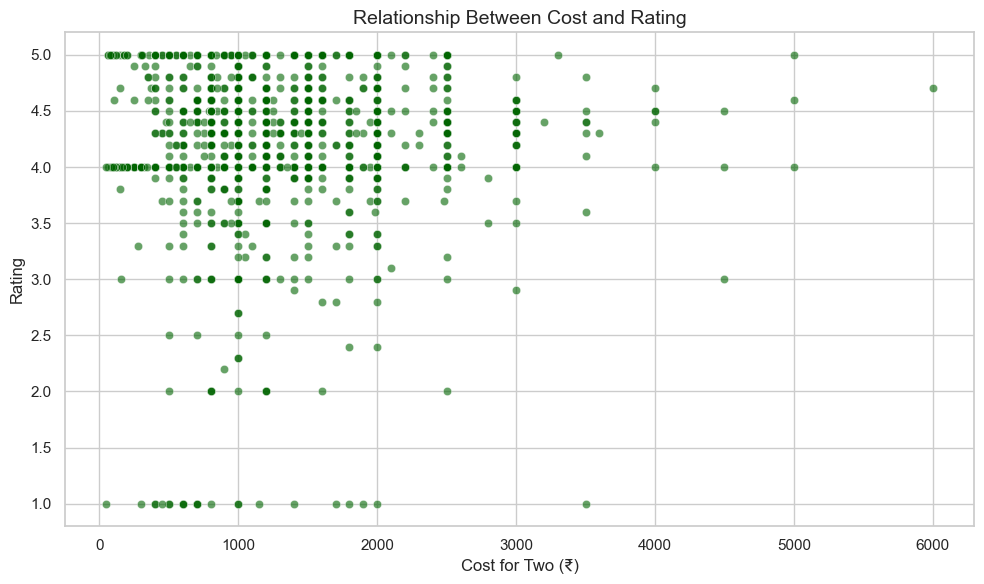

In [195]:
plt.figure()
sns.scatterplot(
    x="cost_for_two_in_rupees",
    y="rating",
    data=df,
    alpha=0.6,
    color="darkgreen"
)

plt.title("Relationship Between Cost and Rating", fontsize=14)
plt.xlabel("Cost for Two (₹)")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("06_rating_vs_cost.png")
plt.show()


In [196]:
"""Insight: There is no strong pattern between cost and rating. Expensive restaurants are not necessarily higher rated. So pricing alone does not guarantee customer satisfaction."""

'Insight: There is no strong pattern between cost and rating. Expensive restaurants are not necessarily higher rated. So pricing alone does not guarantee customer satisfaction.'

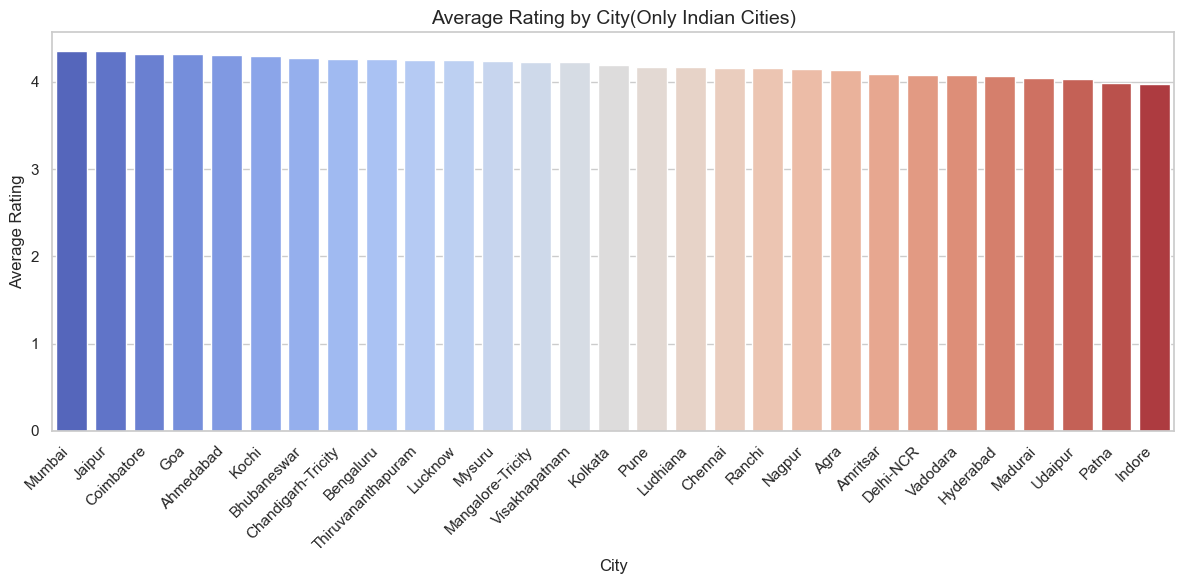

In [197]:
plt.figure(figsize=(12,6))

avg_rating_city = df[(df['city'] != 'Abu-Dhabi') & (df['city'] != 'Dubai')].groupby("city")["rating"].mean().sort_values(ascending=False)

sns.barplot(
    x=avg_rating_city.index,
    y=avg_rating_city.values,
    palette="coolwarm"
)

plt.title("Average Rating by City(Only Indian Cities)", fontsize=14)
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("07_avg_rating_by_city.png")
plt.show()

In [198]:
""" Insight: Most cities have average ratings between 4.0–4.4, meaning quality levels are quite consistent across cities. No city shows extremely poor average rating."""

' Insight: Most cities have average ratings between 4.0–4.4, meaning quality levels are quite consistent across cities. No city shows extremely poor average rating.'

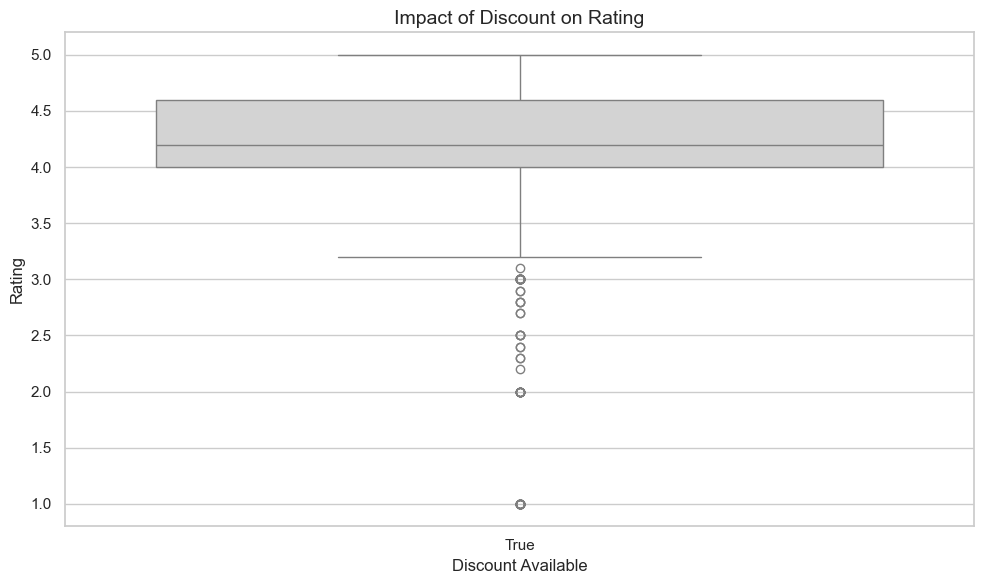

In [199]:
plt.figure()

df["has_discount"] = df["discount"].notna()

sns.boxplot(
    x="has_discount", # True means discount exists
    y="rating",
    data=df,
    palette=["lightgray","orange"]
)

plt.title("Impact of Discount on Rating", fontsize=14)
plt.xlabel("Discount Available")
plt.ylabel("Rating")
plt.tight_layout()
plt.savefig("08_discount_vs_rating.png")
plt.show()


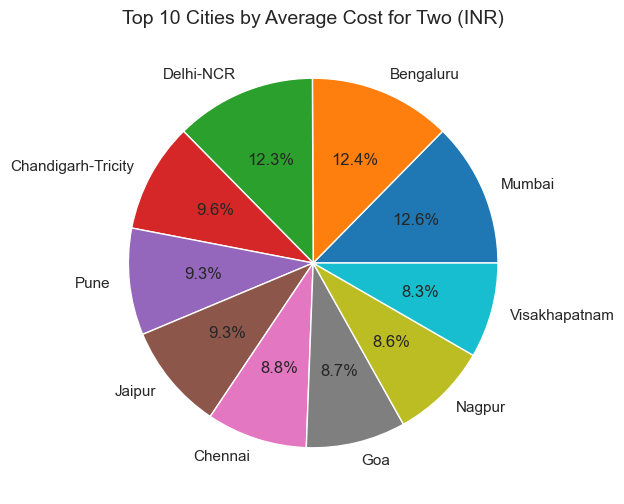

In [200]:
df_p = df.groupby('city')['cost_for_two_in_rupees'].mean().sort_values(ascending = False).head(10)

plt.figure()
df_p.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Cities by Average Cost for Two (INR)')
plt.ylabel('')
plt.savefig('10_top6_city_cost_pie.png')
plt.show()

In [201]:
""" Insight: Discount availability does not significantly change ratings. Restaurants with discounts still have similar rating spread. So customers rate based on experience, not just discount offers."""

' Insight: Discount availability does not significantly change ratings. Restaurants with discounts still have similar rating spread. So customers rate based on experience, not just discount offers.'

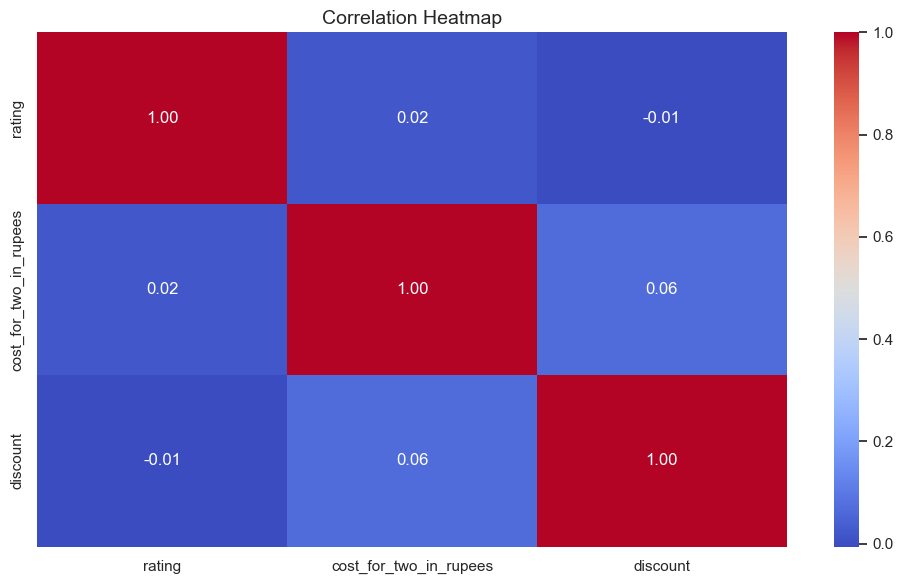

In [202]:
plt.figure()

numeric_cols = df.select_dtypes(include=["float64","int64"])

sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.savefig("09_correlation_heatmap.png")
plt.show()


In [203]:
""" Insight: The correlation between rating, discount and cost_for_two is extremely weak (~0.02-0.06). This confirms that higher pricing and discount does not directly influence rating performance.""" 

' Insight: The correlation between rating, discount and cost_for_two is extremely weak (~0.02-0.06). This confirms that higher pricing and discount does not directly influence rating performance.'

# Points inferred from the above dataframe and visualizations:
- EazyDiner is strongly concentrated in metro cities like Delhi, Mumbai, Bengaluru and Pune, indicating potential expansion opportunity in Tier-2 cities.

- Multicuisine restaurants dominate the platform, showing customer preference for variety over niche specialization.

- Most restaurants fall in mid-price range (₹700–₹1500), meaning the platform targets middle-income dining segment.

- Ratings are generally high (around 4+), indicating overall good restaurant quality on the platform.

- Pricing does not strongly influence ratings — quality and experience matter more than cost.

- Discounts do not significantly impact ratings, suggesting customers prioritize service and food quality over promotional offers.

# Basic EDA questions on the DATA scraped.

In [204]:
df

,restaurant_name,city,area,rating,cost_for_two_in_rupees,cuisine,discount,book_table,walkin_available,has_discount
0,Hard Rock Cafe,Delhi-NCR,"Connaught Place (CP), Central Delhi",4.0,1500.0,Multicuisine,50,False,False,True
1,Desi Villagio,Delhi-NCR,"Connaught Place (CP), Central Delhi",4.1,1300.0,Indian,40,False,False,True
2,"MIST, THE Park New Delhi",Delhi-NCR,"The Park, New Delhi",4.0,2500.0,Multicuisine,35,False,False,True
3,Duty Free Vayu Bar,Delhi-NCR,"Rajouri Garden, West Delhi",4.4,1500.0,"Multicuisine, Cocktail Menu",50,False,False,True
4,Fifty9,Delhi-NCR,"Radisson Blu Marina, New Delhi",4.4,2500.0,Multicuisine,40,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1354,Barbeque Nation,Abu-Dhabi,"Al Wahda Mall, Al Wahda",4.7,150.0,Indian,20,False,False,True
1355,Ushna Comida Restaurant,Abu-Dhabi,The Souk Qaryat Al Beri,5.0,310.0,Indian,40,False,False,True
1356,Thai Point Restaurant,Abu-Dhabi,Al Dhafrah,5.0,75.0,Thai,25,False,False,True
1357,Thai Street Restaurant,Abu-Dhabi,"Al Markaziya, Abu Dhabi",1.0,50.0,Thai,20,False,False,True


In [211]:
# How many restaurants are present in Central Delhi of the the scraped data.
cnt = 0

for i in range(len(df)):
    
    if 'Central Delhi' in df['area'][i]:
        cnt += 1
        
print("The no.of restaurants in Central delhi is", cnt)


The no.of restaurants in Central delhi is 26


In [215]:
# How many 5-star rated restaurants exist in Abu-Dhabi.

print("The 5-star restaurants in Abu-Dhabi is", len(df[(df['city'] == 'Abu-Dhabi') & (df['rating'] == 5.0)]))

The 5-star restaurants in Abu-Dhabi is 3


In [216]:
# Multicuisine offering restaurants in Bengaluru are.
df_b = df[df['city'] == 'Bengaluru']['cuisine'].reset_index()

for i in range(len(df_b)):
    
    if 'Multicuisine' in df_b['cuisine'][i]:
        cnt += 1

print("The no.of restaurants in Bengaluru offering Multicuisine are", cnt)

The no.of restaurants in Bengaluru offering Multicuisine are 62


In [217]:
# The combined/average rating of Restaurants in New delhi are

df_n = df[df["area"].str.contains("New Delhi", na=False)]['rating'].reset_index()
print("The average rating of restaurants in New-Delhi region is", round(df_n['rating'].mean().item(), 2))

The average rating of restaurants in New-Delhi region is 4.01


In [218]:
# Barbeque nation cost(for two) in different cities from scraped data is...

dfba = df[(df['restaurant_name'] == 'Barbeque Nation') & (df['city'] != 'Abu-Dhabi')][['city','cost_for_two_in_rupees']].reset_index()
dfba.groupby('city')['cost_for_two_in_rupees'].sum().reset_index()

,city,cost_for_two_in_rupees
0,Agra,1800.0
1,Ahmedabad,2100.0
2,Coimbatore,2000.0
3,Indore,0.0
4,Ludhiana,1800.0
5,Madurai,2000.0
6,Mangalore-Tricity,1900.0
7,Nagpur,1900.0
8,Ranchi,1800.0
9,Thiruvananthapuram,2000.0
